<a href="https://colab.research.google.com/github/driisss/Intro-To-AI/blob/main/LogistiRegression1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


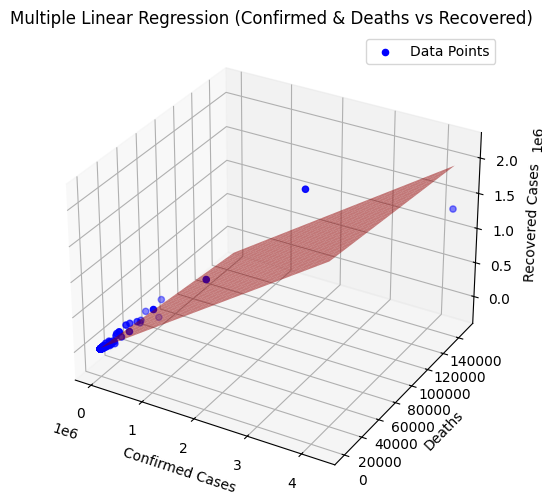

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from mpl_toolkits.mplot3d import Axes3D
import numpy as np

# Load dataset
df = pd.read_csv("/content/country_wise_latest.csv")

# Select relevant columns and drop any rows with missing values
df = df[['Confirmed', 'Deaths', 'Recovered']].dropna()

# Prepare features and target
X = df[['Confirmed', 'Deaths']]
y = df['Recovered']

# Train the model
model = LinearRegression()
model.fit(X, y)

# Create a grid for predictions
confirmed_vals = np.linspace(X['Confirmed'].min(), X['Confirmed'].max(), 20)
deaths_vals = np.linspace(X['Deaths'].min(), X['Deaths'].max(), 20)
confirmed_grid, deaths_grid = np.meshgrid(confirmed_vals, deaths_vals)
Z = model.predict(np.c_[confirmed_grid.ravel(), deaths_grid.ravel()]).reshape(confirmed_grid.shape)

# Plot the 3D regression surface
fig = plt.figure(figsize=(10, 6))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(X['Confirmed'], X['Deaths'], y, c='blue', label='Data Points')
ax.plot_surface(confirmed_grid, deaths_grid, Z, alpha=0.5, color='red')
ax.set_xlabel("Confirmed Cases")
ax.set_ylabel("Deaths")
ax.set_zlabel("Recovered Cases")
ax.set_title("Multiple Linear Regression (Confirmed & Deaths vs Recovered)")
plt.legend()
plt.show()
